# Chapter 2: The iris dataset - your first neural network
## Section 1: downloading the data, and visualising it
The iris dataset contains fifty measurements of three different species of iris flowers. 

The iris setosa: ![setosa](https://www.plant-world-seeds.com/images/seed_images/IRIS_SETOSA_ARCTICA/size3_500x500/F%20IRIS%20SETOSA%20ARCTICA.JPG)
The iris versicolor: ![versicolor](https://upload.wikimedia.org/wikipedia/commons/3/30/Iris_versicolor_2.jpg)
The iris verginica: ![verginica](https://upload.wikimedia.org/wikipedia/commons/2/27/Southern_Blue_Flag_Iris_%28iris_virginica%29_-_Flickr_-_Andrea_Westmoreland.jpg)

A scientist many years ago tried if he could find a difference between these species based on the petal width and height, and the sepal width and height: 
![petal sepal](http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/04/iris_petal_sepal.png)

The iris dataset is an excellent dataset to explain details of neural networks. We start every section by loading the data and visualising several features. 

### Downloading and importing the dataset
The iris dataset is so interesting that it is included in the sklearn python package that was installed in your Docker container. Let's start by loading the data, and several important libraries we are going to use today:




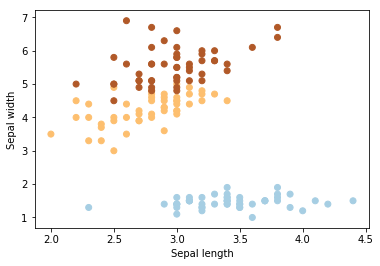

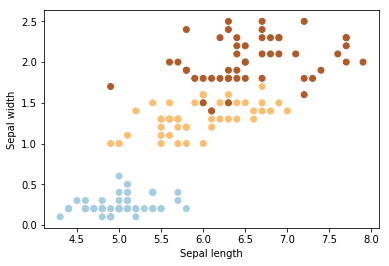

In [1]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
#print(iris)

#print(iris.data[0:10,:])
#print(Y)



plt.scatter(iris.data[:, 1], iris.data[:, 2], c=iris.target, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

plt.scatter(iris.data[:, 0], iris.data[:, 3], c=iris.target, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')



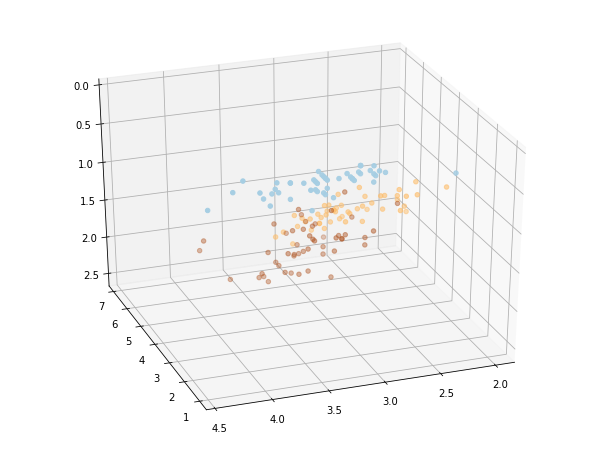

In [2]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(iris.data[:, 1], iris.data[:, 2],iris.data[:, 3], c=iris.target,
           cmap=plt.cm.Paired)

## Section 2: The human brain, and how to formalize it: your first single layer neural network 
Here are some images of neurons in the human brain: 
![neuron 1](https://upload.wikimedia.org/wikipedia/commons/f/fb/Gyrus_Dentatus_40x.jpg)
![neuron 2](https://www.macalester.edu/academics/psychology/whathap/UBNRP/Website_REM_Sleep/bioNeuron.png)
![neuron 3](https://www.researchgate.net/profile/Domen_Verber/publication/224829971/figure/fig2/AS:302710445363204@1449183202992/Fig-2-A-time-diagram-of-neuron-activation-Except-for-a-few-exceptions-the-cells-are.png)

This inspired people long ago to define mathematical models: 
The artificial neuron looks like this: 
![the artificial neuron](https://upload.wikimedia.org/wikipedia/commons/6/60/ArtificialNeuronModel_english.png)

Putting multiple artificial neurons together: 
![neural network](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/1000px-Colored_neural_network.svg.png)

See some stuff here: 
http://www.pinchofintelligence.com/wp-content/uploads/2017/01/Neural-Machine-Translation-For-language-professionals.pdf





Teach forward-propagation, gradients, show learning-rate stuff...

About forward propagation: 

Imagine we only get the value of sepal width. The higher this value, the more unlikely it is that it's a class 3 flower. In terms of neurons we could have this: 


Now we don't only have one input, but multiple inputs. If we only have a "single layer" network, we have a connection from each of the inputs to each of the outputs. 

In terms of computation we can say that we have the following activation for the third class: 

$input1 * w11 + input2 * w12 + input3 * w13$

We can define this as a matrix multiplication. If you are new to this, take a look at this Youtube video: https://www.youtube.com/watch?v=kqWCwwyeE6k

### Bias 
Our dataset contains 50 samples for each flower. In practice it's likely that one of the flowers occurs more often than the others. To help your network train with that we can add a "bias" to our neurons. This would look like this: 
XXXX

### Activation function
As we saw in our brain activation function a cell becomes VERY active after it reached a certain treshold of incoming activation. We want the same to happen in our artificial neural network: an outputcell should have a high activity if it knows it's activated. 

To do this we apply an "activation function" to our output neurons. To speed up the course from the math to practice I will quickly show you the sigmoid activation function in an image: 
![sigmoid activation function](https://qph.ec.quoracdn.net/main-qimg-2f0e7ccc8fd54e238ae46a3d5fcc6908?convert_to_webp=true)
We apply this function to the result of our matrix multiplication. If this result is high, our activation will be one. If this result is 0, our activation will be 0.5. If this result is very negative, our activation will be 0. In later videos we will talk about activation functions, and how to use them, but for now: just keep in mind that we do this. 


## Your first neural network

https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/learn/iris.py


{0, 1, 2}

In [10]:
import tensorflow as tf
tf.reset_default_graph()

n_input = len(iris.data[0])
n_output = 3 # [0,1,2]... set(iris.target)

input_shape = [None,n_input]
inputplaceholder = tf.placeholder(dtype=tf.float32, shape=input_shape, name="input_placeholder") # https://www.tensorflow.org/api_docs/python/tf/placeholder

weights = tf.Variable(tf.random_normal([n_input, n_output]))
biases = tf.Variable(tf.zeros([n_output]))

print(weights)
print(biases)

layer_1 = tf.matmul(inputplaceholder, weights)
layer_2 = tf.add(layer_1, biases)
outputlayer = tf.nn.sigmoid(layer_2)

print(outputlayer)


<tf.Variable 'Variable:0' shape=(4, 3) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=float32_ref>
Tensor("Sigmoid:0", shape=(?, 3), dtype=float32)


## Training your network
Well, looks like we have a neural network that doesn't really do anything. That's because we did not talk about the weights yet. We only did **forward propagation**, but our network does not learn anything. 

We are going to train our neural network using **backpropagation**. Imagine that our network gives a totally wrong prediction for this flower: 

-- input --

-- output --

In our case, we surely say that this output is wrong. We would have liked class X and X to be zero, and class X to be one. We can define a certain **cost** for the error our network makes, by applying a [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)


In this case we want the activation of class X to be higher, and of class X and X to be lower. The logical thing to do is to change the weights that contributed to the wrong output. As we don't know what the ideal weights are we are only going to change them a little bit, and hope that this helps. 

Let's determine what weights to lower based on the **gradient**, and lower them proportionally to the **cost**. To define how hard we change them we define a **learning rate**. If our learning rate is low we only change our weighs a little bit, if our learning rate is high we change them very fast!

This method is called **gradient descent**. You look where the wrong output is coming from (the gradient), and lower the weights that contributed to this. Tensorflow has a function for this! We only need to define our cost function (which is based on the output we expected), the cost (how wrong the network is), and how we **optimize** our neural network. 




In [12]:
learning_rate = 0.1

labelsplaceholder = tf.placeholder(dtype=tf.float32, shape=[None,n_output], name="labels_placeholder")
cost = tf.losses.mean_squared_error(labelsplaceholder, outputlayer) # https://www.tensorflow.org/api_docs/python/tf/losses/mean_squared_error

print(cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost) #https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer

Tensor("mean_squared_error/value:0", shape=(), dtype=float32)


## Training

We defined everything, and our Tensorflow graph should now look like this: 



Next we start training by feeding it several samples and labels. 


In [28]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)


In [34]:
import random
mydata = list(zip(iris.data, iris.target))

# for x in mydata:
#     print(x)

batch_size = 10

history_loss = list()
for _ in range(400):
    inputdata = list()
    outputlogits = list()
    for _ in range(batch_size):
        input_output_pairs = random.choice(mydata)
        inputdata.append(input_output_pairs[0])
        output_expected = [0.0,0.0,0.0]
        output_expected[input_output_pairs[1]] = 1.0
        outputlogits.append(output_expected)

    res_optimizer, res_cost = sess.run([optimizer, cost], feed_dict={inputplaceholder: inputdata, labelsplaceholder: outputlogits})
    print(res_cost)
    history_loss.append(res_cost)

0.236955
0.417865
0.388519
0.360486
0.329255
0.257841
0.333887
0.227232
0.232772
0.4201
0.335544
0.187741
0.347308
0.113987
0.282488
0.324606
0.244556
0.369129
0.315539
0.437289
0.300041
0.373565
0.414995
0.227848
0.387706
0.248896
0.386343
0.289044
0.265684
0.35774
0.333813
0.227412
0.432065
0.386922
0.364352
0.241525
0.254953
0.301892
0.222034
0.463713
0.320913
0.402811
0.458719
0.275419
0.244988
0.196358
0.324799
0.398051
0.276871
0.277365
0.397817
0.357712
0.375972
0.360961
0.32649
0.330715
0.267893
0.316108
0.360114
0.363698
0.330447
0.417835
0.405907
0.14389
0.294266
0.361609
0.329053
0.272273
0.28796
0.260165
0.286038
0.387483
0.339111
0.328012
0.317525
0.408134
0.353811
0.293015
0.344505
0.390463
0.320815
0.309063
0.363249
0.26944
0.193969
0.267742
0.392454
0.28175
0.287616
0.320435
0.357474
0.352361
0.310279
0.280564
0.238876
0.315307
0.349249
0.219626
0.394955
0.302107
0.305277
0.244438
0.304003
0.40699
0.313768
0.284119
0.187193
0.3217
0.365666
0.296137
0.227713
0.371662
0.2

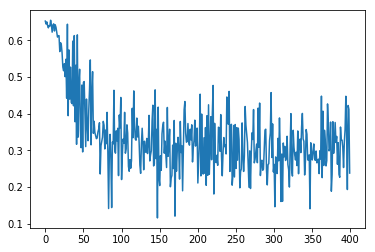

In [33]:
plt.plot(history_loss)

In [39]:
## Now let's classify our flowers: 
for i in range(len(iris.data)):
    predicted_by_network = sess.run(outputlayer, feed_dict={inputplaceholder: [iris.data[i]]})
    print("input: %s, expected: %s, predicted: %s " % (str(iris.data[i]), str(iris.target[i]), str(predicted_by_network)))

input: [ 5.1  3.5  1.4  0.2], expected: 0, predicted: [[ 0.54326403  0.1707792   0.00261805]] 
input: [ 4.9  3.   1.4  0.2], expected: 0, predicted: [[ 0.55072975  0.22371356  0.00409925]] 
input: [ 4.7  3.2  1.3  0.2], expected: 0, predicted: [[ 0.54225492  0.19031936  0.00433502]] 
input: [ 4.6  3.1  1.5  0.2], expected: 0, predicted: [[ 0.52386028  0.21599509  0.00662747]] 
input: [ 5.   3.6  1.4  0.2], expected: 0, predicted: [[ 0.53479701  0.16003509  0.00287166]] 
input: [ 5.4  3.9  1.7  0.4], expected: 0, predicted: [[ 0.49906465  0.13363431  0.00336379]] 
input: [ 4.6  3.4  1.4  0.3], expected: 0, predicted: [[ 0.51192182  0.16307099  0.00637232]] 
input: [ 5.   3.4  1.5  0.2], expected: 0, predicted: [[ 0.53333473  0.18703152  0.0035221 ]] 
input: [ 4.4  2.9  1.4  0.2], expected: 0, predicted: [[ 0.52933615  0.22934914  0.0081414 ]] 
input: [ 4.9  3.1  1.5  0.1], expected: 0, predicted: [[ 0.54866433  0.23528382  0.00366801]] 
input: [ 5.4  3.7  1.5  0.2], expected: 0, predict

input: [ 7.2  3.6  6.1  2.5], expected: 2, predicted: [[ 0.12699357  0.22344001  0.883461  ]] 
input: [ 6.5  3.2  5.1  2. ], expected: 2, predicted: [[ 0.18632641  0.25715101  0.68612933]] 
input: [ 6.4  2.7  5.3  1.9], expected: 2, predicted: [[ 0.18967023  0.36970147  0.76077098]] 
input: [ 6.8  3.   5.5  2.1], expected: 2, predicted: [[ 0.17345275  0.31156629  0.76608151]] 
input: [ 5.7  2.5  5.   2. ], expected: 2, predicted: [[ 0.18211126  0.33667257  0.87665945]] 
input: [ 5.8  2.8  5.1  2.4], expected: 2, predicted: [[ 0.15228844  0.23440635  0.9345594 ]] 
input: [ 6.4  3.2  5.3  2.3], expected: 2, predicted: [[ 0.15696709  0.22528975  0.85573959]] 
input: [ 6.5  3.   5.5  1.8], expected: 2, predicted: [[ 0.1820529   0.365206    0.72483075]] 
input: [ 7.7  3.8  6.7  2.2], expected: 2, predicted: [[ 0.12559409  0.3106972   0.81214237]] 
input: [ 7.7  2.6  6.9  2.3], expected: 2, predicted: [[ 0.13243799  0.51363188  0.9152053 ]] 
input: [ 6.   2.2  5.   1.5], expected: 2, predict

## Section 3: The math behind optimization: backpropagation + understanding the gradients 

We now saw what a simple single-layer neural network can do: it can learn the input-output of this dataset with flowers pretty well! Although there is a dire mistake we made (we "overfit" the network, more on that later), it is great to see that our network can predict what kind of flower something is. 

Let's take a look at the gradients of our network while it's training. 

In our case, the gradients are defined between the calculation of the loss of our network and the tensor we want to see the gradients for. 

In [50]:
#grad_labels, grad_weigths, grad_biases = tf.gradients(cost, [labelsplaceholder,weights, biases ]) # https://www.tensorflow.org/api_docs/python/tf/gradients
grad_labels, grad_weights, grad_biases = tf.gradients(cost, [labelsplaceholder,weights, biases ]) # https://www.tensorflow.org/api_docs/python/tf/gradients
print(grad_labels)
print(grad_weights)
print(grad_biases)


#    res_optimizer, res_cost = sess.run([optimizer, cost])
res_grad_lab, res_grad_w, res_grad_b = sess.run([grad_labels, grad_weights, grad_biases], feed_dict={inputplaceholder: inputdata, labelsplaceholder: outputlogits})

print(res_grad_lab)
print(res_grad_w)
print(res_grad_b)

Tensor("gradients_10/mean_squared_error/SquaredDifference_grad/Neg:0", shape=(?, 3), dtype=float32)
Tensor("gradients_10/MatMul_grad/MatMul_1:0", shape=(4, 3), dtype=float32)
Tensor("gradients_10/Add_grad/Reshape_1:0", shape=(3,), dtype=float32)
[[-0.01866849  0.04580208 -0.01153378]
 [-0.01647887  0.04332163 -0.01824538]
 [-0.00988373 -0.01683244  0.00782495]
 [ 0.03174265 -0.01439967 -0.00044183]
 [-0.02039278  0.04363564 -0.01437386]
 [-0.00976112 -0.02125721  0.00683996]
 [-0.01179336 -0.03095444  0.01998491]
 [-0.0121733  -0.01516124  0.01917242]
 [-0.02039278  0.04363564 -0.01437386]
 [-0.0234667   0.04294464 -0.00762771]]
[[ 0.13222712 -0.16670163  0.00102721]
 [ 0.05189677 -0.0788901   0.00317885]
 [ 0.10602309 -0.09427412 -0.00711214]
 [ 0.03715062 -0.02307411 -0.00597795]]
[ 0.01892713 -0.02868836  0.00135114]


### Backpropagation
The values you see above are the difference between what we would like to have as output, and what we have as output. 
Imagine that we try to predict `[1.0, 0.0, 0.0]`, but actually predict `[0.0, 1.0, 0.0]`. In this case the weights that contributed to the first value should have been lower, and the weights that contributed to the second value should have been higher. This is calculated by taking the derivative of the function used to calculate these values. Although knowing how to derive these functions is very useful when you are building new layers, or applying for a new job, I actually never had to derive such a function myself in practice. This is why I will not go deeper into this. 

We explained everything here already above. 

Now you know that you can manually inspect these gradients. You could even visualise them during training, or see why a certain neuron is activated. 

### Why bother with gradients
Knowing about gradients and inspecting them is a vital part of working with neural networks. If your network is stuck, broke, or does not perform as you expect it: take a look at the gradients!

Part of why this is important is that in very deep neural networks we are dealing with vanishing and exploding gradients. Imagine that you start with a high gradient in your final layer, and multiply this with the learning rate. You update your weights and move on to the next layer. Your loss is lower in this layer, and thus your gradient is lower. 

The last couple of years scientists discovered that this flow of gradients is VITAL for deep learning. 

A few "nice to know" layers and models in which scientists realised this are: 

XXX

XXX

and XXX


## Section 4: Introduction to overfitting: splitting your data in train, test, and validation set. 

Above we saw that we were perfectly able to predict all of the data samples we trained on. You might think: great, we are done here. 

Unfortunately this is not the case with deep learning. The most extreme example is that if we take many images, assign random labels, and train a deep neural network on it, you are able to learn everything!

This is why you should use a train, test, and validation set. You train on the train set, and see how well it performs. As soon as you are satisfied with that performance you test on the test set. Only after you are satisfied with the performance on the test set you take the validation set. 

You are free to choose your own ideal split for your project. For small data projects I would normally take 70% train, 15% test, and 15% validation. If you have a huge dataset you could even take more train data (85% train, 10% test, 5% validation). This is simply because 5% of a huge dataset is still a huge dataset. During this course I will always ignore the validation dataset, which is bad practice, but speeds up our development. 

Scikits SKLearn package has a nice [function that can split the data for you](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 

In [52]:
from sklearn import model_selection 

x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


In [53]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)

mydata = list(zip(x_train, y_train))


batch_size = 10

history_loss = list()
for _ in range(400):
    inputdata = list()
    outputlogits = list()
    for _ in range(batch_size):
        input_output_pairs = random.choice(mydata)
        inputdata.append(input_output_pairs[0])
        output_expected = [0.0,0.0,0.0]
        output_expected[input_output_pairs[1]] = 1.0
        outputlogits.append(output_expected)

    res_optimizer, res_cost = sess.run([optimizer, cost], feed_dict={inputplaceholder: inputdata, labelsplaceholder: outputlogits})
    print(res_cost)
    history_loss.append(res_cost)

0.430255
0.364948
0.555477
0.296549
0.472324
0.268455
0.393935
0.386957
0.44014
0.347874
0.440182
0.364147
0.246305
0.228673
0.360761
0.456707
0.357834
0.392314
0.298264
0.199759
0.224261
0.250126
0.341657
0.265304
0.365977
0.352859
0.302908
0.301658
0.301446
0.2979
0.367899
0.301858
0.265459
0.389835
0.303413
0.3334
0.403397
0.33588
0.344524
0.421284
0.294442
0.34881
0.316325
0.208807
0.257244
0.398775
0.486348
0.391478
0.451629
0.355374
0.401322
0.301344
0.438801
0.406882
0.443165
0.366052
0.30464
0.346814
0.341501
0.416683
0.372625
0.3538
0.257472
0.484763
0.263584
0.301154
0.340608
0.386332
0.29634
0.436158
0.311
0.411882
0.256696
0.442392
0.344187
0.392089
0.359625
0.406698
0.392482
0.297067
0.304006
0.258952
0.441672
0.260229
0.30005
0.305129
0.242215
0.295932
0.271291
0.342135
0.372051
0.227717
0.29984
0.261617
0.386262
0.112364
0.259516
0.339746
0.455616
0.436795
0.243988
0.281947
0.323049
0.364335
0.455132
0.299163
0.20731
0.344356
0.340728
0.343296
0.42836
0.37255
0.345571
0.

In [56]:
print(x_test)

[[ 6.1  2.8  4.7  1.2]
 [ 5.7  3.8  1.7  0.3]
 [ 7.7  2.6  6.9  2.3]
 [ 6.   2.9  4.5  1.5]
 [ 6.8  2.8  4.8  1.4]
 [ 5.4  3.4  1.5  0.4]
 [ 5.6  2.9  3.6  1.3]
 [ 6.9  3.1  5.1  2.3]
 [ 6.2  2.2  4.5  1.5]
 [ 5.8  2.7  3.9  1.2]
 [ 6.5  3.2  5.1  2. ]
 [ 4.8  3.   1.4  0.1]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.1  3.8  1.5  0.3]
 [ 6.3  3.3  4.7  1.6]
 [ 6.5  3.   5.8  2.2]
 [ 5.6  2.5  3.9  1.1]
 [ 5.7  2.8  4.5  1.3]
 [ 6.4  2.8  5.6  2.2]
 [ 4.7  3.2  1.6  0.2]
 [ 6.1  3.   4.9  1.8]
 [ 5.   3.4  1.6  0.4]
 [ 6.4  2.8  5.6  2.1]
 [ 7.9  3.8  6.4  2. ]
 [ 6.7  3.   5.2  2.3]
 [ 6.7  2.5  5.8  1.8]
 [ 6.8  3.2  5.9  2.3]
 [ 4.8  3.   1.4  0.3]
 [ 4.8  3.1  1.6  0.2]]


In [59]:
logit_y_test = list()
for label in y_test: 
    toadd = [0.0,0.0,0.0]
    toadd[label] = 1.0
    logit_y_test.append(toadd)
res_cost, predicted = sess.run([cost, outputlayer], feed_dict={inputplaceholder: x_test, labelsplaceholder: logit_y_test})

In [60]:
print(res_cost)

0.317345


In [63]:
for index in range(len(y_test)):
    print("Label: %d, predicted: %s" % (y_test[index], predicted[index]))

Label: 1, predicted: [ 0.99993753  0.40196094  0.44881591]
Label: 0, predicted: [ 0.98250639  0.1755174   0.01679846]
Label: 2, predicted: [ 0.99999964  0.51710141  0.86772823]
Label: 1, predicted: [ 0.9999193   0.36963424  0.45416254]
Label: 1, predicted: [ 0.99997807  0.39276206  0.41492334]
Label: 0, predicted: [ 0.982265    0.19531444  0.02316192]
Label: 1, predicted: [ 0.99959916  0.32413867  0.28193301]
Label: 2, predicted: [ 0.99998903  0.35043821  0.5808115 ]
Label: 1, predicted: [ 0.99997246  0.4442848   0.54781145]
Label: 1, predicted: [ 0.99980861  0.36418486  0.33092234]
Label: 2, predicted: [ 0.99997616  0.3543328   0.56279194]
Label: 0, predicted: [ 0.97068888  0.23398048  0.03064099]
Label: 0, predicted: [ 0.97456938  0.18302876  0.01488286]
Label: 0, predicted: [ 0.97353733  0.22976676  0.02971757]
Label: 0, predicted: [ 0.95774853  0.17235005  0.01926614]
Label: 1, predicted: [ 0.9999305   0.33359018  0.40961912]
Label: 2, predicted: [ 0.99999261  0.4156892   0.7638415

In [62]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0])

In [65]:
biases.eval(session=sess)

array([ 0.03087393,  0.08342226, -0.15895623], dtype=float32)

## Section 5: Evaluation of our network - Wrapup and conclusion. Things we learned

Great! We made our first neural network, with a single layer. To be honest, it performed... poorly on the testset. This dataset is interesting for starters in neural networks. It's possible to get way higher scores using techniques we will learn in later chapters. I encourage you to go back to this set at the end of the course. 

Things we learned in the first part of this course are: 
- We now know a little bit about the brain, know what a neuron is, and what a mathematical definition of a neuron is. 
- We made a very simple neural network by combining weights, biases, and an activation function. 
- Using gradient descent we trained our neural network, and got pretty good scores on the trainset
- We split our data and tried our method on the testset, and learned that we totally overfit it. 

Let's quickly go to the next part, where we learn how to create these networks in a simpler way.
Next up: predicting the energy of atoms